In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline
import seaborn as sns

import requests
import json
import re

### APIでデータ読み込み

In [38]:
# APIの仕様は
url_path = "https://www.land.mlit.go.jp/webland/api/TradeListSearch?from=20171&to=20185&area=13"
request_result = requests.get(url_path)
data_json = request_result.json()["data"]

ConnectionError: ignored

In [0]:
print(len(data_json))

In [0]:
print(data_json[0])

In [0]:
print(data_json[1000])

In [0]:
data_pd = pd.io.json.json_normalize(data_json)
print(data_pd.shape)

In [0]:
print(data_pd.head(10))

In [0]:
print(data_pd.isnull().sum())

### CSVファイルからデータ読み込み

In [0]:
data_from_csv = pd.read_csv("13_Tokyo_20171_20184.csv", encoding='cp932')

In [41]:
print(data_from_csv.shape)

(29638, 30)


In [42]:
print(data_from_csv.iloc[0])

No                     1
種類              中古マンション等
地域                   NaN
市区町村コード            13101
都道府県名                東京都
市区町村名               千代田区
地区名                  飯田橋
最寄駅：名称               飯田橋
最寄駅：距離（分）              4
取引価格（総額）        13000000
坪単価                  NaN
間取り                   １Ｋ
面積（㎡）                 20
取引価格（㎡単価）            NaN
土地の形状                NaN
間口                   NaN
延床面積（㎡）              NaN
建築年                昭和57年
建物の構造                ＳＲＣ
用途                   NaN
今後の利用目的               住宅
前面道路：方位              NaN
前面道路：種類              NaN
前面道路：幅員（ｍ）           NaN
都市計画                商業地域
建ぺい率（％）               80
容積率（％）               700
取引時点          2018年第３四半期
改装                   未改装
取引の事情等               NaN
Name: 0, dtype: object


In [43]:
# 最初の5行を確認
data_from_csv.head(5)

,No,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,坪単価,間取り,面積（㎡）,取引価格（㎡単価）,土地の形状,間口,延床面積（㎡）,建築年,建物の構造,用途,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等
0,1,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,4,13000000,NaN,１Ｋ,20,NaN,NaN,NaN,NaN,昭和57年,ＳＲＣ,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,700.0,2018年第３四半期,未改装,NaN
1,2,宅地(土地と建物),商業地,13101,東京都,千代田区,飯田橋,飯田橋,3,250000000,NaN,NaN,80,NaN,ほぼ台形,6.8,330,昭和61年,ＲＣ,住宅、事務所、店舗,事務所,南西,区道,8.0,商業地域,80.0,500.0,2018年第２四半期,NaN,NaN
2,3,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,3,22000000,NaN,１Ｋ,30,NaN,NaN,NaN,NaN,昭和60年,ＳＲＣ,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,700.0,2018年第２四半期,未改装,NaN
3,4,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,1,69000000,NaN,２ＬＤＫ,70,NaN,NaN,NaN,NaN,昭和59年,ＳＲＣ,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,600.0,2018年第２四半期,未改装,NaN
4,5,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,3,21000000,NaN,１Ｋ,25,NaN,NaN,NaN,NaN,昭和60年,ＳＲＣ,住宅,事務所,NaN,NaN,NaN,商業地域,80.0,700.0,2018年第２四半期,未改装,NaN


### データ整形

In [44]:
# unique() をつけると、重複を削除して表示してくれる
data_from_csv["種類"].unique()

array(['中古マンション等', '宅地(土地と建物)', '宅地(土地)'], dtype=object)

In [45]:
# 対象を中古マンションに限定
data_used_apartment = data_from_csv.query('種類 == "中古マンション等"')
data_used_apartment.shape

(19129, 30)

In [46]:
data_used_apartment.head(5)

,No,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,坪単価,間取り,面積（㎡）,取引価格（㎡単価）,土地の形状,間口,延床面積（㎡）,建築年,建物の構造,用途,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等
0,1,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,4,13000000,NaN,１Ｋ,20,NaN,NaN,NaN,NaN,昭和57年,ＳＲＣ,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,700.0,2018年第３四半期,未改装,NaN
2,3,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,3,22000000,NaN,１Ｋ,30,NaN,NaN,NaN,NaN,昭和60年,ＳＲＣ,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,700.0,2018年第２四半期,未改装,NaN
3,4,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,1,69000000,NaN,２ＬＤＫ,70,NaN,NaN,NaN,NaN,昭和59年,ＳＲＣ,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,600.0,2018年第２四半期,未改装,NaN
4,5,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,3,21000000,NaN,１Ｋ,25,NaN,NaN,NaN,NaN,昭和60年,ＳＲＣ,住宅,事務所,NaN,NaN,NaN,商業地域,80.0,700.0,2018年第２四半期,未改装,NaN
5,6,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,4,81000000,NaN,３ＬＤＫ,70,NaN,NaN,NaN,NaN,平成19年,ＲＣ,住宅,その他,NaN,NaN,NaN,商業地域,80.0,500.0,2018年第２四半期,未改装,NaN


In [0]:
# 欠損データの数を確認
data_used_apartment.isnull().sum()

In [47]:
# 用いる説明変数を以下のように指定
columns_name_list = ["最寄駅：距離（分）", "間取り", "面積（㎡）","建築年", "建物の構造", "建ぺい率（％）", "容積率（％）", "市区町村名", "取引価格（総額）"]

data_selected = data_used_apartment[columns_name_list]
print(data_selected.shape)

(19129, 9)


In [48]:
# 一つでもNANデータを含む行を削除
data_selected_dropna = data_selected.dropna(how='any')
print(data_selected_dropna.shape)
print(data_selected_dropna.iloc[0])

(17693, 9)
最寄駅：距離（分）           4
間取り                １Ｋ
面積（㎡）              20
建築年             昭和57年
建物の構造             ＳＲＣ
建ぺい率（％）            80
容積率（％）            700
市区町村名            千代田区
取引価格（総額）     13000000
Name: 0, dtype: object


In [49]:
data_selected_dropna["建築年"].unique()

array(['昭和57年', '昭和60年', '昭和59年', '平成19年', '平成15年', '平成24年', '平成11年',
       '平成16年', '平成9年', '昭和45年', '昭和51年', '昭和47年', '昭和52年', '平成21年',
       '平成13年', '平成25年', '平成18年', '平成17年', '平成12年', '平成14年', '昭和56年',
       '平成27年', '平成26年', '昭和54年', '昭和55年', '平成20年', '平成28年', '平成10年',
       '平成23年', '昭和53年', '昭和63年', '昭和50年', '平成4年', '平成29年', '昭和46年',
       '昭和44年', '昭和61年', '平成22年', '昭和58年', '平成8年', '平成3年', '昭和48年',
       '昭和49年', '平成6年', '平成7年', '平成5年', '平成30年', '昭和64年', '昭和39年',
       '昭和28年', '平成2年', '昭和35年', '昭和41年', '昭和43年', '昭和62年', '昭和24年',
       '昭和40年', '昭和25年', '昭和42年', '昭和38年', '昭和37年', '昭和36年', '戦前'],
      dtype=object)

* 建築年が文字列で入っていて扱いが難しい
* そこで、全て築年数に変換する
* 例えば、平成24年ならば西暦2012年　→ 築年数8年というように

In [50]:
data_selected_dropna = data_selected_dropna[data_selected_dropna["建築年"].str.match('^平成|昭和')]


wareki_to_seireki = {'昭和': 1926-1, '平成': 1989-1}

building_year_list = data_selected_dropna["建築年"]

building_age_list = []
for building_year in building_year_list:
    # 昭和○年 → 昭和, ○ に変換、平成○年 → 平成, ○ に変換
    building_year_split = re.search(r'(.+?)([0-9]+|元)年', building_year)
    # 西暦に変換
    seireki = wareki_to_seireki[building_year_split.groups()[0]] + int(building_year_split.groups()[1])
   
    building_age = 2018 - seireki # 築年数に変換
    building_age_list.append(building_age)

    
data_selected_dropna["築年数"] = building_age_list # 新しく、築年数列を追加

# もう使わないので、建築年列は削除
data_added_building_age = data_selected_dropna.drop("建築年", axis=1)
print(data_added_building_age.head())

  最寄駅：距離（分）   間取り 面積（㎡） 建物の構造  建ぺい率（％）  容積率（％） 市区町村名  取引価格（総額）  築年数
0         4    １Ｋ    20   ＳＲＣ     80.0   700.0  千代田区  13000000   36
2         3    １Ｋ    30   ＳＲＣ     80.0   700.0  千代田区  22000000   33
3         1  ２ＬＤＫ    70   ＳＲＣ     80.0   600.0  千代田区  69000000   34
4         3    １Ｋ    25   ＳＲＣ     80.0   700.0  千代田区  21000000   33
5         4  ３ＬＤＫ    70    ＲＣ     80.0   500.0  千代田区  81000000   11


### （補足説明）連続値ではない変数
* スライド紹介した例では、不動産価格に対する説明変数は、部屋面積・駅からの距離と、どちらも連続値
* しかし、全ての説明変数が連続値である必要はない

---

* 例えば、「バストイレが別かどうか」という条件を数値化したいとき
* そのような時は、バストイレが別の場合に1、バストイレが別ではない場合に0をとる変数を作ればよい

|部屋面積（平方メートル）|最寄駅からの距離（メートル）|バストイレ|不動産価格（万円）|
|---|---|---|---|
|65|200|1|6400|
|35|1000|1|3500|
|185|1500|0|42000|
|45|300|0|4700|
|80|800|0|7400|
|50|2000|1|4500|
|・・・|・・・||

$y$を不動産価格、$x_1$を部屋面積、$x_2$を駅からの距離、$x_3$をバストイレが別かどうかとすると、以下のように式が立てられる。

$$
y = w_1x_1 + w_2x_2 + w_3x_3 + w_0
$$

例えば、以下のようにパラメータ$w_0, w_1, w_2, w_3$が定まったとすると…
$$
y = 100x_1 - 2x_2 + 300x_3 + 200
$$

このとき、
* $x_1$(部屋面積)が1平方メートル増えると$y$(不動産価格）は100万円上がり、$x_2$（駅からの距離）が1メートル遠くなると$y$(不動産価格）が2万円下がる。
バストイレが別の場合、バストイレ一緒のときと比べて、$y$（不動産価格）が300万円上がるということになる。

---
このように、数値ではないデータを0や1など数値に変換した変数を、**ダミー変数**と呼ぶ。

* ダミー変数化のための、専用の get_dummies() 関数がpandasには用意されている
* ダミー変数化したものを追加し、最終的なデータセットを作成しましょう。

In [51]:
# ダミー変数化しないもののリスト
columns_name_list = ["最寄駅：距離（分）", "面積（㎡）","築年数", "建ぺい率（％）", "容積率（％）", "取引価格（総額）"]
# ダミー変数化するリスト
dummy_list = ["間取り", "建物の構造", "市区町村名"]

# ダミー変数を追加
data_added_dummies = pd.concat([data_added_building_age[columns_name_list],
                   pd.get_dummies(data_added_building_age[dummy_list], drop_first=True)], axis=1)

print(data_added_dummies.shape)
print(data_added_dummies.iloc[0])

(17692, 49)
最寄駅：距離（分）               4
面積（㎡）                  20
築年数                    36
建ぺい率（％）                80
容積率（％）                700
取引価格（総額）         13000000
間取り_スタジオ                0
間取り_１ＤＫ                 0
間取り_１Ｋ                  1
間取り_１Ｋ＋Ｓ                0
間取り_１ＬＤＫ                0
間取り_１ＬＤＫ＋Ｓ              0
間取り_１Ｒ                  0
間取り_２ＤＫ                 0
間取り_２ＤＫ＋Ｓ               0
間取り_２Ｋ                  0
間取り_２Ｋ＋Ｓ                0
間取り_２ＬＤＫ                0
間取り_２ＬＤＫ＋Ｓ              0
間取り_３ＤＫ                 0
間取り_３Ｋ                  0
間取り_３ＬＤＫ                0
間取り_３ＬＤＫ＋Ｋ              0
間取り_３ＬＤＫ＋Ｓ              0
間取り_４ＤＫ                 0
間取り_４Ｋ                  0
間取り_４ＬＤＫ                0
間取り_５ＬＤＫ                0
建物の構造_鉄骨造               0
建物の構造_ＲＣ                0
建物の構造_ＳＲＣ               1
建物の構造_ＳＲＣ、鉄骨造           0
建物の構造_ＳＲＣ、ＲＣ            0
市区町村名_中央区               0
市区町村名_中野区               0
市区町村名_北区                0
市区町村名_千代田区              1
市区町村名_台東区               0


In [0]:
print(data_added_dummies.dtypes)

* CSVファイルからデータを読み込むと、数値データとなっていて欲しいところが文字列として認識されてしまうことがある
* 以下のように強制的に数値データに変換する
* 変換には、astype() 関数を用いる
  * 数値データへの変換であれば、astype(float)
  * 文字列データへの変換であれば、astype(str)


* なお、"最寄駅：距離（分）"を確認すると、「2H?」など不確定なデータが入っていたため、それも同時に除く  

In [0]:
data_added_dummies["面積（㎡）"] = data_added_dummies["面積（㎡）"].astype(float)
data_added_dummies = data_added_dummies[~data_added_dummies['最寄駅：距離（分）'].str.contains('\?')]
data_added_dummies["最寄駅：距離（分）"] = data_added_dummies["最寄駅：距離（分）"].astype(float)

In [0]:
print(data_added_dummies.dtypes)

## 可視化

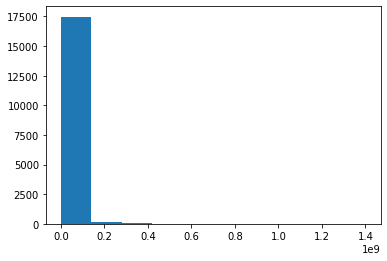

In [53]:
# 先ほど学んだヒストグラム
plt.hist(data_added_dummies["取引価格（総額）"])
plt.show()

* 極端に価格が高い不動産があるせいで、非常に偏ったグラフが出力された
* 6000万円未満の不動産に絞り、再度ヒストグラムを生成

(15020, 49)


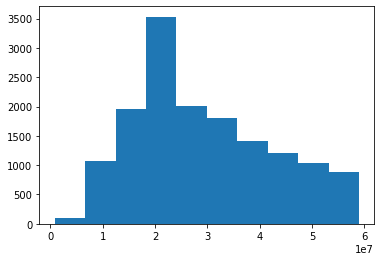

In [54]:
tmp_data = data_added_dummies[data_added_dummies["取引価格（総額）"] < 60000000]
print(tmp_data.shape)
plt.hist(tmp_data["取引価格（総額）"])
plt.show()

In [0]:
data_added_dummies = data_added_dummies[data_added_dummies["取引価格（総額）"] < 60000000]

## 線形回帰を実践

### scikit-learn

* データの前処理や、モデル作成まで色々揃っている素晴らしいライブラリ
* 今回用いる線形回帰はもちろん、様々なモデルを作ることができる
* なるべくなら、scikit-learnの中だけで完結してソースコードがかけるとよい
* 今回は、その豊富な道具の中から、以下を使う
  * LinearRegression: 線形回帰をするためのモジュール
  * train_test_split: 学習データとテストデータを分割する

* 説明変数には 面積のみを指定して単回帰を実践
* $y$を取引価格（総額）、$x$を面積としたときに、以下のような式のパラメータ（$w_1, w_0$）を求めます。

$$ y = w_1x + w_0 $$

In [0]:
from sklearn.linear_model import LinearRegression # 線形回帰をする用のモジュールを呼び出し
from sklearn.model_selection import train_test_split # 検証用に学習データとテストデータを分割してくれるモジュールを呼び出し

* 以下を実行し、scikit-learnの線形回帰用のインスタンスを生成
  * lr = LinearRegression()
* 説明変数、目的変数をそれぞれ指定し、fit() という関数を実行するだけで完了

In [56]:
lr = LinearRegression()

x_column_list = ['面積（㎡）']
y_column_list = ['取引価格（総額）']

# 説明変数と目的変数に分割
x = data_added_dummies[x_column_list]
y = data_added_dummies[y_column_list]

lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* 学習されたパラメータの値は、以下で確認することができる
* coef_ は前述した式の$w_1$に該当し、intercept_ は同じく前述した式の$w_0$に該当する



In [57]:
print(lr.coef_)
print(lr.intercept_)

[[995266.49638322]]
[-3912780.44220172]


* この結果から、「部屋面積が1$m^2$増加するごとに、343720円（約34万円）程度取引価格が増加する」という示唆を得ることができる
* 1つの説明変数だけなので、相当荒いが…

### 重回帰分析

In [58]:
x = data_added_dummies.drop("取引価格（総額）", axis=1) # 「取引価格（総額）」以外のデータをxに代入
y = data_added_dummies["取引価格（総額）"]

print(x.head())
print(y.head())

   最寄駅：距離（分）  面積（㎡）  築年数  建ぺい率（％）  ...  市区町村名_渋谷区  市区町村名_港区  市区町村名_目黒区  市区町村名_豊島区
0        4.0   20.0   36     80.0  ...          0         0          0          0
2        3.0   30.0   33     80.0  ...          0         0          0          0
3        1.0   70.0   34     80.0  ...          0         0          0          0
4        3.0   25.0   33     80.0  ...          0         0          0          0
5        4.0   70.0   11     80.0  ...          0         0          0          0

[5 rows x 48 columns]
0    13000000
2    22000000
3    69000000
4    21000000
5    81000000
Name: 取引価格（総額）, dtype: int64


In [59]:
lr_multi = LinearRegression()
lr_multi.fit(x, y)

print(lr_multi.coef_)
print(lr_multi.intercept_)

[-5.70560124e+05  1.29419499e+06 -5.87089758e+05 -5.43381194e+04
  5.47432629e+03  1.08802639e+07  4.90818778e+06  9.10625185e+06
 -1.52318363e+07 -2.37145204e+05 -5.53792840e+06  1.12266338e+07
 -1.32490698e+06 -7.90777876e+06  6.04416319e+06 -2.45143806e+06
 -4.62844963e+06 -1.27434741e+07 -7.89428497e+06 -9.81345045e+06
 -1.30241560e+07 -1.01084910e+07 -2.26105978e+07 -2.35083440e+07
 -2.09385187e+06 -2.55701095e+07 -1.08062690e+08  3.45817371e+07
  2.27134243e+07  2.22434383e+07  5.36329696e+07  1.41721143e+07
  3.16590292e+06  1.05222993e+06 -7.55993550e+06  1.37779401e+07
 -3.29057575e+06  3.08804347e+06 -4.42921398e+06 -3.20948569e+06
  2.43860515e+06  4.04237146e+06  4.57872685e+05 -8.36165291e+06
  1.35227804e+07  2.11172614e+07  1.14546516e+07  1.40300669e+06]
-25954238.10975501


In [60]:
for i in range(len(lr_multi.coef_)):
  print(x.columns[i], lr_multi.coef_[i])

最寄駅：距離（分） -570560.123558652
面積（㎡） 1294194.986222082
築年数 -587089.757945491
建ぺい率（％） -54338.119440599025
容積率（％） 5474.3262896490305
間取り_スタジオ 10880263.861443717
間取り_１ＤＫ 4908187.781631659
間取り_１Ｋ 9106251.854934826
間取り_１Ｋ＋Ｓ -15231836.345585138
間取り_１ＬＤＫ -237145.2038456883
間取り_１ＬＤＫ＋Ｓ -5537928.404064583
間取り_１Ｒ 11226633.790126804
間取り_２ＤＫ -1324906.9830408203
間取り_２ＤＫ＋Ｓ -7907778.760510383
間取り_２Ｋ 6044163.192951501
間取り_２Ｋ＋Ｓ -2451438.061407356
間取り_２ＬＤＫ -4628449.625237293
間取り_２ＬＤＫ＋Ｓ -12743474.10411745
間取り_３ＤＫ -7894284.972395672
間取り_３Ｋ -9813450.453239243
間取り_３ＬＤＫ -13024155.993359815
間取り_３ＬＤＫ＋Ｋ -10108491.01628832
間取り_３ＬＤＫ＋Ｓ -22610597.771357015
間取り_４ＤＫ -23508343.989213347
間取り_４Ｋ -2093851.8686051068
間取り_４ＬＤＫ -25570109.4618925
間取り_５ＬＤＫ -108062690.35972062
建物の構造_鉄骨造 34581737.08487679
建物の構造_ＲＣ 22713424.31786499
建物の構造_ＳＲＣ 22243438.266242992
建物の構造_ＳＲＣ、鉄骨造 53632969.64179708
建物の構造_ＳＲＣ、ＲＣ 14172114.273080582
市区町村名_中央区 3165902.916532342
市区町村名_中野区 1052229.925505975
市区町村名_北区 -7559935.503285717
市区町村名_千代田区 13777940.054830

## 予測

In [61]:
x = data_added_dummies.drop("取引価格（総額）", axis=1)
y = data_added_dummies["取引価格（総額）"]

# 全体のデータの中から、7割を学習データに、3割をテストデータに使う
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12380, 48)
(5307, 48)
(12380,)
(5307,)


In [62]:
# これまでと同様に学習してパラメータを求める
lr_multi2 = LinearRegression()

lr_multi2.fit(X_train, y_train) 
print(lr_multi2.coef_)
print(lr_multi2.intercept_)

[-5.13139643e+05  1.29377139e+06 -5.81050484e+05 -7.22890521e+04
  8.56660784e+03  1.02710605e+07  6.16921314e+06  1.04840139e+07
  2.94297934e-07  1.12327045e+06 -6.53890382e+06  1.23152325e+07
 -1.09521295e+05 -5.33393785e+06  7.03627504e+06 -6.10491422e+05
 -2.84921843e+06 -9.67378099e+06 -6.57228254e+06 -8.86752533e+06
 -1.13573759e+07 -8.60760873e+06 -2.11486453e+07 -2.23324821e+07
 -7.49015445e+05 -2.84130287e+07 -1.06757475e+08  3.57462364e+07
  2.30227659e+07  2.25407530e+07  5.47916602e+07  1.33378157e+07
  3.43868850e+06  9.17517208e+05 -6.55383798e+06  1.28928453e+07
 -4.04074836e+06  2.76790063e+06 -4.79261156e+06 -3.18232211e+06
  2.32991059e+06  3.41070774e+06  4.16886084e+05 -8.71435732e+06
  1.26661442e+07  2.11111755e+07  1.22860741e+07  9.78475033e+05]
-27796107.483201727


In [63]:
y_pred = lr_multi2.predict(X_test)
print(y_pred)

[19970500.95781481 35423627.06575321  4307328.90486994 ...
 43046246.13267876 21711081.63981165 52884965.79045741]


In [64]:
print(y_pred - y_test)

22169   -5.029499e+06
12582    3.423627e+06
4064    -1.669267e+07
19142   -4.638335e+05
9785    -1.171536e+07
             ...     
21733    2.108435e+07
8969    -9.129432e+06
20912   -1.953754e+06
10070   -1.288918e+06
1631    -9.115034e+06
Name: 取引価格（総額）, Length: 5307, dtype: float64


## MAE
* 各データに対して、予測値と実際値の差分の絶対値を計算し、その平均をとったもの
* この値が小さいほど良いモデルと評価される

In [0]:
from sklearn.metrics import mean_absolute_error

x_column_list = ['面積（㎡）']
y_column_list = ['取引価格（総額）']


X_train, X_test, y_train, y_test = train_test_split(data_added_dummies[x_column_list], data_added_dummies[y_column_list], test_size=0.3)

lr_single = LinearRegression()

lr_single.fit(X_train, y_train) 
y_pred = lr_single.predict(X_test)

print(mean_absolute_error(y_pred, y_test))

In [0]:
x = data_added_dummies.drop("取引価格（総額）", axis=1)
y = data_added_dummies["取引価格（総額）"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.7)

lr_multi2 = LinearRegression()

lr_multi2.fit(X_train, y_train) 
y_pred = lr_multi2.predict(X_test)

print(mean_absolute_error(y_pred, y_test))